Alterações:

* extrair dia, ano, mês (ISO 8601)
* título em todos os gráficos
* arrumar labels
* melhorar gráficos

<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [2]:
dados = pd.read_csv('../Dados/Consumo_Cerveja.csv', sep = ';')

## Visualizar os dados

In [3]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


## Verificando o tamanho do dataset

In [4]:
dados.shape

(365, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [5]:
# descrição dos dados; arredondados
dados.describe().round()

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.0,365.0,365.0,365.0,365.0,365.0
mean,21.0,17.0,27.0,5.0,0.0,25401.0
std,3.0,3.0,4.0,12.0,0.0,4399.0
min,13.0,11.0,14.0,0.0,0.0,14343.0
25%,19.0,15.0,24.0,0.0,0.0,22008.0
50%,21.0,18.0,27.0,0.0,0.0,24867.0
75%,23.0,20.0,29.0,3.0,1.0,28631.0
max,29.0,24.0,36.0,95.0,1.0,37937.0


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

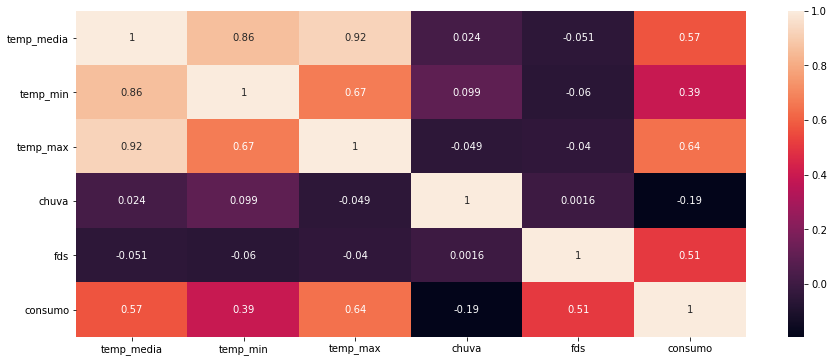

In [6]:
plt.figure(figsize = (15,6))
sns.heatmap(dados.corr(), annot = True);

Olhando inicialmente, poderíamos escolher as seguintes variáveis no nosso conjunto de variáveis independentes/preditoras: temp_max, chuva e fds. 

A variável temp_max tem maior correlação com a variável target.

As variáveis temp_media e temp_min tem alta correlação entre si e com temp_max. Lembrando que não é uma boa prática utilizar na modelagem de um fenômeno variáveis que explicam de forma parecida esse fenômeno, como é o caso das variáveis de temperatura. Portanto, em modelos de regressão linear, é importante que as variáveis explicativas (X's) não tenham forte correlação entre si.

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

## Data

In [7]:
# year-month-day

In [8]:
#dados['data'] = pd.to_datetime(dados['data'])

In [9]:
#dados['data'] = [date.strftime('%Y-%m-%d') for date in data]

In [10]:
# dados['dia'] = dados['data'].dt.day
# dados['mes'] = dados['data'].dt.month
# dados['ano'] = dados['data'].dt.year

## Análises gráficas

### Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

Comportamento da variável dependente:

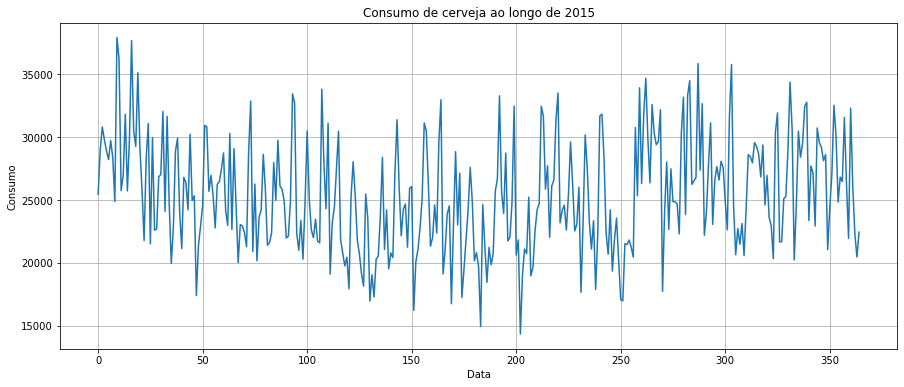

In [11]:
# Plotando gráfico de linha para mostrar a evolução do consumo de cerveja durante o tempo
# titulo
# eixos

fig, ax = plt.subplots()
ax = dados['consumo'].plot(figsize = (15,6))
ax.set_title('Consumo de cerveja ao longo de 2015')
ax.set_xlabel('Data')
ax.set_ylabel('Consumo')
ax.grid();

# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

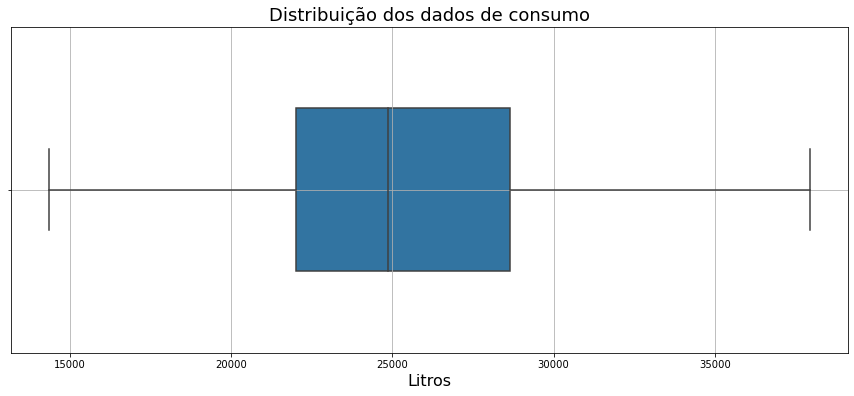

In [12]:
# criar boxplot com a distribuição dos dados de consumo

ax = sns.boxplot(dados['consumo'], width = .5)
ax.figure.set_size_inches((15,6))
ax.set_title('Distribuição dos dados de consumo', fontsize = 18)
ax.set_xlabel('Litros', fontsize = 16)
ax.grid();

Temos uma distribuição aparentemente bem comportada, com a mediana um pouco abaixo do centro dos dados.

# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

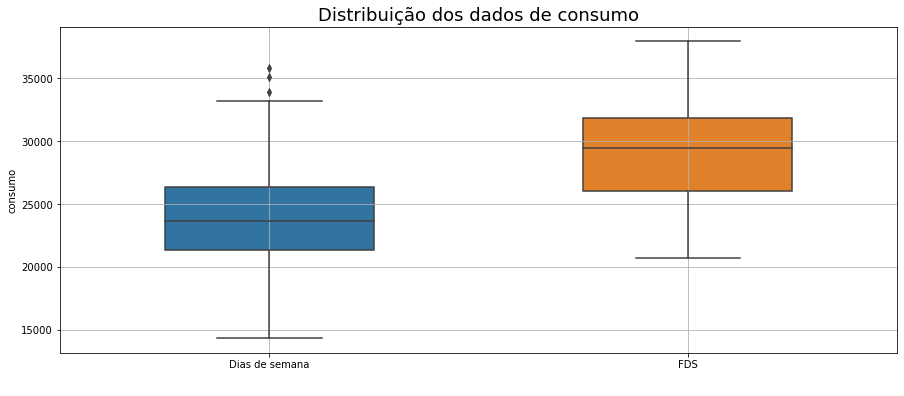

In [13]:
ax = sns.boxplot(x = 'fds', y = 'consumo', data = dados, orient = 'v', width = .5)
ax.figure.set_size_inches((15,6))
ax.set_title('Distribuição dos dados de consumo', fontsize = 18)
ax.set_xlabel(' ', fontsize = 16)
plt.xticks(ticks = [0,1], labels = ['Dias de semana', 'FDS'])
ax.grid();

O gráfico acima nos mostra que o consumo de cerveja aumenta nos fins de semana, como é de se esperar. Há, durante os dias de semana, alguns outliers, que, talvez, sejam provenientes de feriados.

## Configurações de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

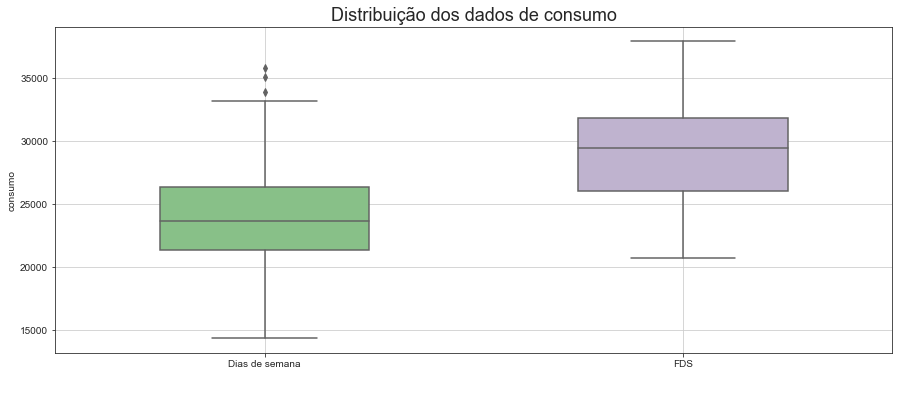

In [14]:
# modificar o gráfico com outra palette de cores e outro estilo
sns.set_palette('Accent')
sns.set_style('ticks')
ax = sns.boxplot(x = 'fds', y = 'consumo', data = dados, orient = 'v', width = .5)
ax.figure.set_size_inches((15,6))
ax.set_title('Distribuição dos dados de consumo', fontsize = 18)
ax.set_xlabel(' ', fontsize = 16)
plt.xticks(ticks = [0,1], labels = ['Dias de semana', 'FDS'])
ax.grid();

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

Vamos verificar se a distribuição dos dados de consumo de cerveja se aproxima de uma normal. 

Uma de suas características é a simetria em torno da média.

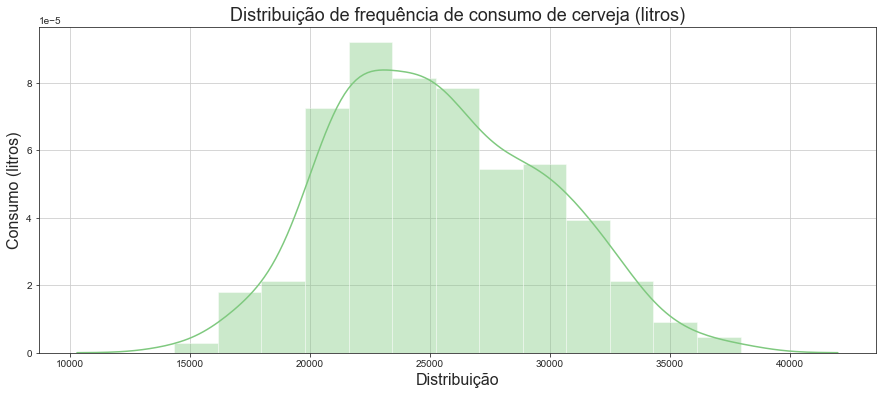

In [15]:
# histograma
#plt.figure(figsize = (15,6))

sns.set_palette('Accent')
sns.set_style('ticks')
ax = sns.distplot(dados['consumo']);
ax.figure.set_size_inches((15,6))
ax.set_title('Distribuição de frequência de consumo de cerveja (litros)', fontsize = 18)
ax.set_xlabel('Distribuição', fontsize = 16)
ax.set_ylabel('Consumo (litros)', fontsize = 16)
ax.grid();

A curva da distribuição lembra uma normal, contudo, possui uma skew positiva, ou seja, é assimétrica à direita, para onde sua "cauda" se alonga.
Aqui estamos interessados apenas em fazer testes informais. Sendo assim, vamos assumir a distribuição como está. Em outros casos, poderíamos fazer algumas alterações nos dados ou mesmo tentar acrescentar mais dados na amostra para aproximá-los de uma normal.

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

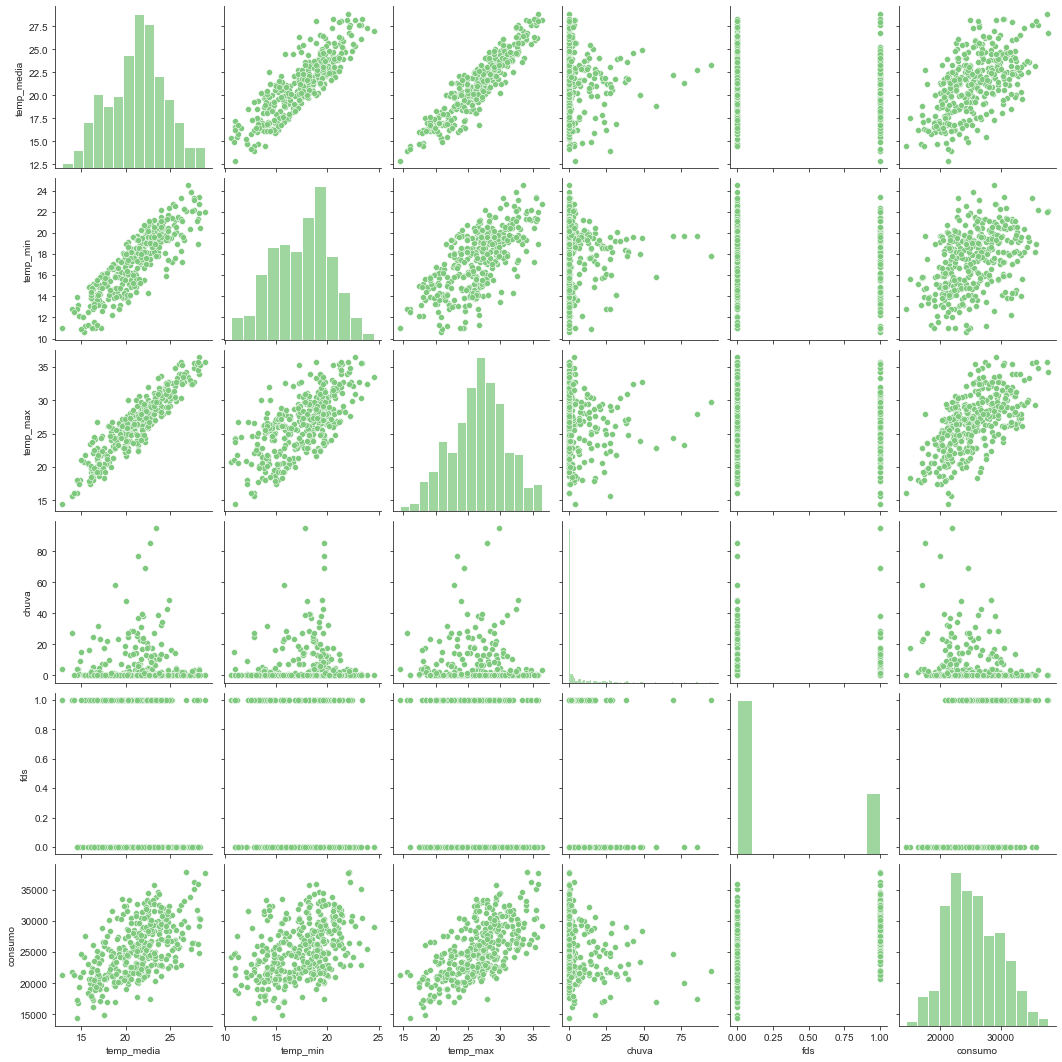

In [16]:
sns.pairplot(data = dados);

## Plotando o pairplot fixando somente uma variável no eixo y

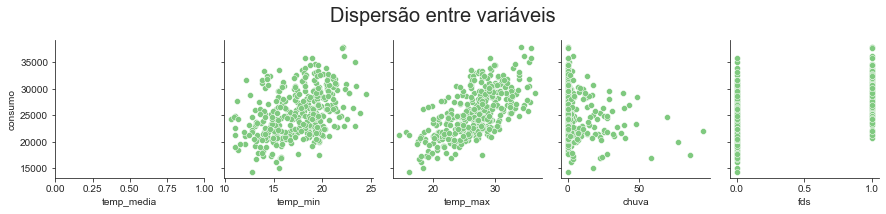

In [17]:
ax = sns.pairplot(dados, y_vars = 'consumo', 
                  x_vars = ['temp_media', 'temp_min', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre variáveis', fontsize = 20, y = 1.15)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

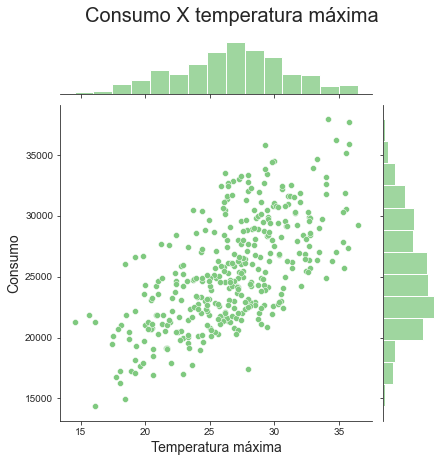

In [18]:
# jointplot
# subtítulo
# nomear eixos
ax = sns.jointplot(x = 'temp_max', y = 'consumo', data = dados)
ax.fig.suptitle('Consumo X temperatura máxima', fontsize = 20, y = 1.05)
ax.set_axis_labels('Temperatura máxima', 'Consumo', fontsize = 14);

## Plotando um jointplot com a reta de regressão estimada

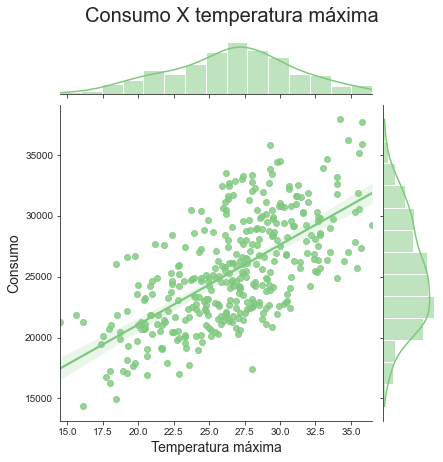

In [19]:
ax = sns.jointplot(x = 'temp_max', y = 'consumo', data = dados, kind = 'reg')
ax.fig.suptitle('Consumo X temperatura máxima', fontsize = 20, y = 1.05)
ax.set_axis_labels('Temperatura máxima', 'Consumo', fontsize = 14);

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

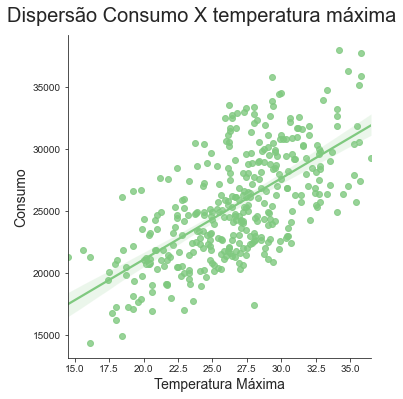

In [20]:
# lmplot
# subtítulo
# eixos
ax = sns.lmplot(x = 'temp_max', y = 'consumo', data = dados)
ax.fig.suptitle('Dispersão Consumo X temperatura máxima', fontsize = 20, y = 1.05)
ax.set_xlabels('Temperatura Máxima', fontsize = 14)
ax.set_ylabels('Consumo', fontsize = 14);

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

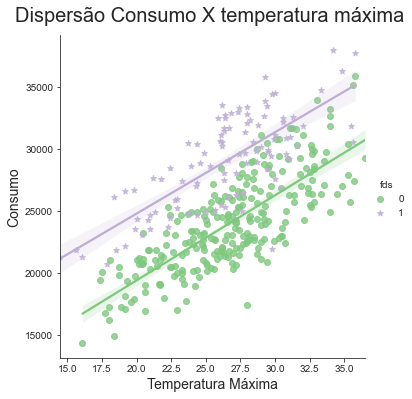

In [21]:
# lmplot
# hue e marker
# subtítulo
# eixos
ax = sns.lmplot(x = 'temp_max', y = 'consumo', data = dados, hue = 'fds', markers = ['o', '*'])
ax.fig.suptitle('Dispersão Consumo X temperatura máxima', fontsize = 20, y = 1.05)
ax.set_xlabels('Temperatura Máxima', fontsize = 14)
ax.set_ylabels('Consumo', fontsize = 14);

Verifica-se, visivelmente no gráfico acima, que o consumo de cerveja aumenta nos fins de semana.

Podemos verificar a mesma informação com a separação em dois gráficos, um com fim de semana e outro não.

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

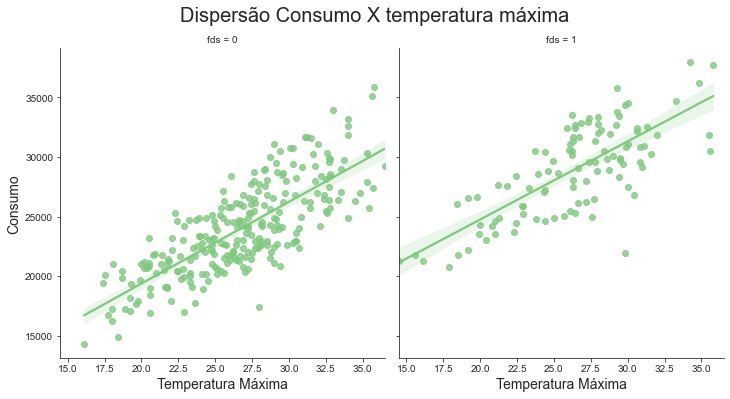

In [22]:
ax = sns.lmplot(x = 'temp_max', y = 'consumo', data = dados, col = 'fds')
ax.fig.suptitle('Dispersão Consumo X temperatura máxima', fontsize = 20, y = 1.05)
ax.set_xlabels('Temperatura Máxima', fontsize = 14)
ax.set_ylabels('Consumo', fontsize = 14);

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

## Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [23]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [24]:
y = dados['consumo']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [25]:
X = dados[['temp_max', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

In [26]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = .3, random_state = 2811)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [27]:
# X_treino
X_treino.shape

(255, 3)

In [28]:
# X_teste
X_teste.shape

(110, 3)

In [29]:
# y_treino
y_treino.shape

(255,)

In [30]:
# y_teste
y_teste.shape

(110,)

<img width='600px' src='../Dados/img/reg_01.jpg'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

## Instanciando a classe *LinearRegression()*

In [31]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [32]:
modelo.fit(X_treino, y_treino)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [33]:
print('R² (quanto da variação do fenômeno é explicada pelas variáveis explicativas/independentes?) = {}'.format(modelo.score(X_treino, y_treino).round(2)))

R² (quanto da variação do fenômeno é explicada pelas variáveis explicativas/independentes?) = 0.73


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [34]:
y_previsto = modelo.predict(X_teste)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [35]:
r2_score(y_teste, y_previsto).round(2)

0.69

# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [36]:
entrada = X_teste[0:1]

In [37]:
y_teste[0:1]

5    28218
Name: consumo, dtype: int64

## Gerando previsão pontual

In [38]:
modelo.predict(entrada)[0]

26094.901775262017

## Criando um simulador simples

In [39]:
temp_max = 40
chuva = 0
fds = 1
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros.'.format(modelo.predict(entrada)[0]))

38742.53 litros.


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='600px' src='../Dados/img/reg_02.jpg'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [40]:
# obter o intercepto do modelo
modelo.intercept_

5951.9763393124485

In [41]:
# tipo de dado do intercepto do modelo
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [42]:
# obter coeficientes de regressão
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [43]:
# tipo
type(modelo.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [44]:
X_teste.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [45]:
index = ['intercepto', 'temp_max', 'chuva', 'fds']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [46]:
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parâmetros'])

,Parâmetros
intercepto,5951.976339
temp_max,684.736759
chuva,-60.782435
fds,5401.083339


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

Análise gráficas sobre os resultados das previsões, para tentar entender se esses resultados são realmente válidos. Utilizaremos técnicas informais que vão indicar se temos que nos preocupar com determinado problema. 

Outros testes normais podem ser aplicados aqui para fazer tais verificações.

## Gerando as previsões do modelo para os dados de TREINO

In [47]:
y_pred_treino = modelo.predict(X_treino)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

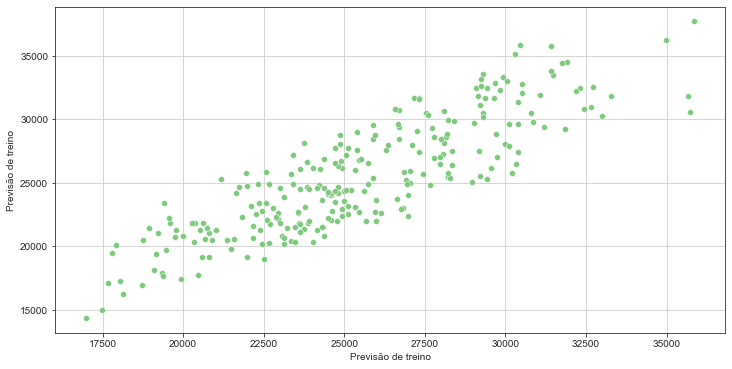

In [48]:
ax = sns.scatterplot(x = y_pred_treino, y = y_treino)
ax.figure.set_size_inches((12,6))
ax.set_xlabel('Previsão de treino')
ax.set_ylabel('Previsão de treino')
plt.grid();

Os dados parecem estar ajustados. Um detalhe que podemos perceber nessa dispersão é que os pontos começam mais afunilados, mas vão apresentando uma variação maior conforme os valores dos eixos são aumentados. Talvez as previsões não sejam tão boas para valores mais altos.

## Obtendo os resíduos

Y - Ŷ = resíduos

In [49]:
residuos = y_treino - y_pred_treino

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

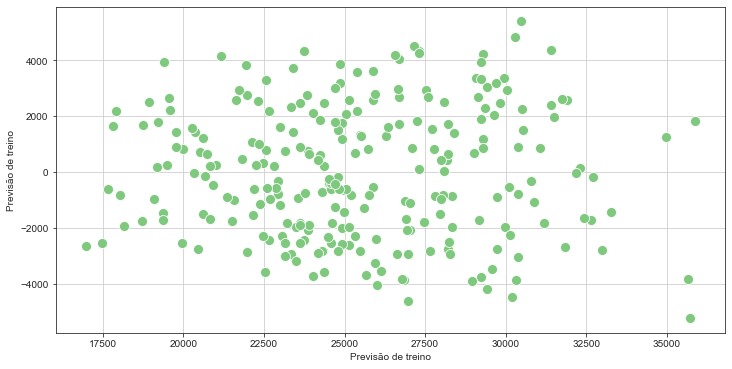

In [50]:
ax = sns.scatterplot(x = y_pred_treino, y = residuos, s = 100)
ax.figure.set_size_inches((12,6))
ax.set_xlabel('Previsão de treino')
ax.set_ylabel('Previsão de treino')
plt.grid();

O gráfico de dispersão dos resíduos nos mostra que, conforme maiores os valores nos eixos, a variação vai aumentando. o ideal é que a variação seja constante, ou seja, que permaneça dentro de um intervalo. 

## Utilizando os resíduos ao quadrado

<img width='800px' src='../Dados/img/var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

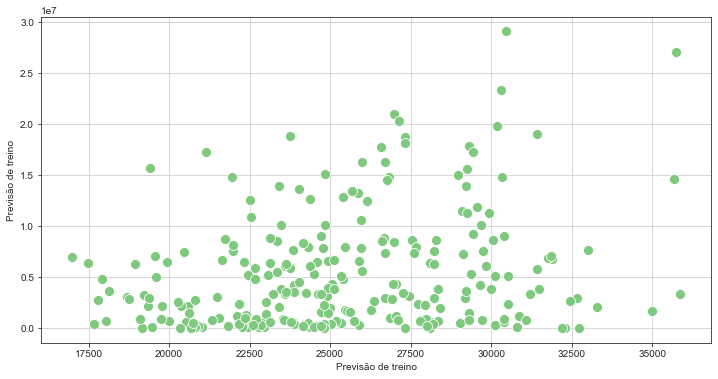

In [51]:
# resíduos ao quadrado, para deixar todos os valores positivos
ax = sns.scatterplot(x = y_pred_treino, y = residuos**2, s = 100)
ax.figure.set_size_inches((12,6))
ax.set_xlabel('Previsão de treino')
ax.set_ylabel('Previsão de treino')
plt.grid();

Heterocedasticidade não é bom!

## Plotando a distribuição de frequências dos resíduos

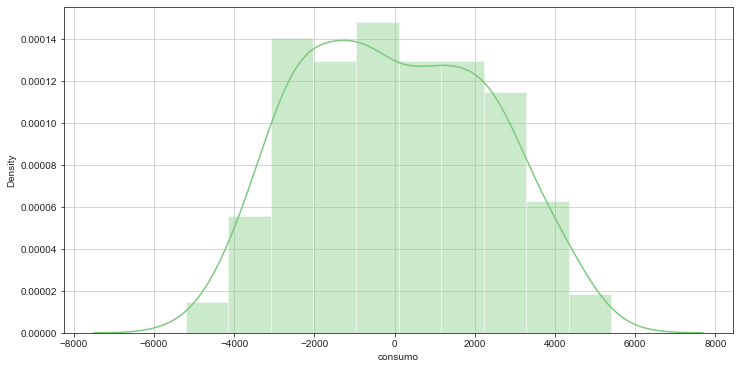

In [52]:
# histograma
ax = sns.distplot(residuos)
ax.figure.set_size_inches((12,6))
#ax.set_xlabel('Previsão de treino')
#ax.set_ylabel('Previsão de treino')
plt.grid();

A idéia é que a distribuição dos resíduos siga uma curva normal, o que não acontece nesse caso. 

Uma curva normal de resíduos indica um bom ajuste do modelo.

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

Uma das formas de avaliar a comparação e poder decidir qual o melhor modelo é através da observação dos coeficientes de determinação dos modelos comparados.

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [53]:
X2 = dados[['temp_media', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

In [54]:
X2_treino, X2_teste, y2_treino, y2_teste = train_test_split(X2, y, test_size = 0.3, random_state = 2811)

## Instanciando a classe *LinearRegression()*

In [55]:
modelo2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [56]:
modelo2.fit(X2_treino, y2_treino)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [58]:
print('R² temp_media: {}'.format(modelo2.score(X2_treino, y2_treino).round(2)))

R² temp_media: 0.66


In [59]:
print('R² temp_max: {}'.format(modelo.score(X_treino, y_treino).round(2)))

R² temp_max: 0.73


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [60]:
y_pred2 = modelo2.predict(X2_teste)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [61]:
print('R² predict temp_media: {}'.format(r2_score(y2_teste, y_pred2).round(2)))

R² predict temp_media: 0.66


In [63]:
print('R² predict temp_max: {}'.format(r2_score(y_teste, y_previsto).round(2)))

R² predict temp_max: 0.69


A comparação entre modelos só é possível quando a variável dependente, dos modelos em comparação, for a mesma.

Verificamos, então, que a variável temp_max aumenta o valor de explicativo do conjunto das variáveis explicativas sobre a variável dependente.

# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [74]:
EQM_media = mean_squared_error(y2_teste, y_pred2).round(2)
REQM_media = np.sqrt(mean_squared_error(y2_teste, y_pred2)).round(2)
R2_media = r2_score(y2_teste, y_pred2).round(2)

df_metricas_temp_media = pd.DataFrame([EQM_media, REQM_media, R2_media], 
                                      index = ['EQM_media', 'REQM_media', 'R²_media'], columns=[''])

In [75]:
df_metricas_temp_media

,
EQM_media,6060775.46
REQM_media,2461.86
R²_media,0.66


## Obtendo métricas para o modelo com Temperatura Máxima

In [77]:
EQM_max = mean_squared_error(y_teste, y_previsto).round(2)
REQM_max = np.sqrt(mean_squared_error(y_teste, y_previsto)).round(2)
R2_max = r2_score(y_teste, y_previsto).round(2)

df_metricas_temp_max = pd.DataFrame([EQM_max, REQM_max, R2_max], 
                                      index = ['EQM_max', 'REQM_max', 'R²_max'], columns=[''])

In [78]:
df_metricas_temp_max

,
EQM_max,5471976.38
REQM_max,2339.23
R²_max,0.69


O modelo treinado com a variável temperatura máxima em conjunto com chuva e fds obteve melhor ajuste sobre a variável target. Em um resumo fácil, podemos dizer que, nele, temos, em média, 2339.23 litros, em média, de erro. Já no outro modelo, utilizando a temperatura média, temos 2461.86 litros, em média, de erro.

# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [79]:
X_teste[0:1]

,temp_max,chuva,fds
5,30.5,12.2,0


In [80]:
entrada = X_teste[0:1]

## Gerando previsão pontual

In [81]:
modelo.predict(entrada)[0]

26094.901775262017

## Criando um simulador simples

In [83]:
temp_max = 40
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

32599.90 litros


## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [ ]:
# importar pickle

In [ ]:
# criar arquivo modelo_consumo_cerveja


In [ ]:
# dump

In [ ]:
# fechar o arquivo criado

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```